In [1]:
import numpy as np
import random

import os
import pickle
import sys
import timeit

import pandas as pd
import seaborn as sns

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import make_spd_matrix
from sklearn.ensemble import RandomForestRegressor
from scipy.stats.stats import pearsonr 

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from matplotlib.ticker import FormatStrFormatter

from matplotlib.pyplot import imshow
%matplotlib inline 

from IPython.display import Image 

from util import fit_IPTW_LR, fit_IPTW_RF, fit_IPTW_SVM
from util import sim_Data, sim_Unobs_Data, evaluation, placebo_confounder, bayes_unobs_confounder, refutation_analysis
import pickle

<img src="split_treatment.png" width="400"/>

## Generate data with no-unobs. confounding

Avg compliance: 0.9000000000000001
Fit IPTW + LR
p_A: 0.5499, IPTW: 1.00 +/- 0.06
Est. Y_0 RMSE: 0.012299225218357303
Est. Y_1 RMSE: 0.12456970011104408
95.0% A matched Z, RMSE: 0.15
Fit IPTW + SVM
p_A: 0.5499, IPTW: 1.00 +/- 0.06
Est. Y_0 RMSE: 0.0022991014965426265
Est. Y_1 RMSE: 0.034035015444051055
95.0% A matched Z, RMSE: 0.18


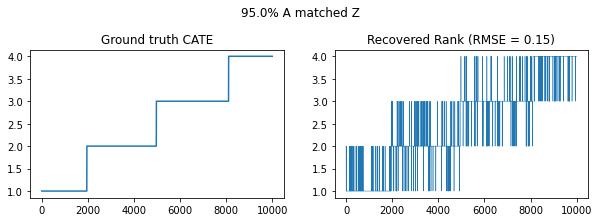

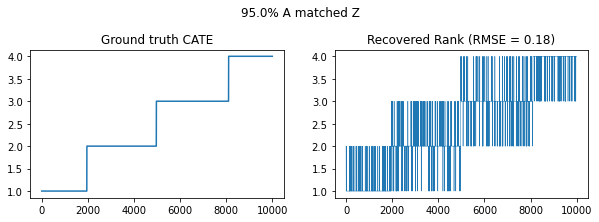

In [2]:
xDim = 50
nSim = 10000

p_AgivenZ = 1
p_AgivenNotZ = 0.1
        
X_data, Y_data, A_data, nObs, Group_data, Y_0_data, Y_1_data, Z, A = sim_Data(xDim, nSim, p_AgivenZ, p_AgivenNotZ)

print('Fit IPTW + LR')
Yhat_0, Yhat_1 = fit_IPTW_LR(X_data, Y_data, A_data, nObs)
a_matched_z, rmse, recovered_rank = evaluation(Yhat_0, Yhat_1, Group_data, Y_0_data, Y_1_data, A, Z)

print('Fit IPTW + SVM')
Yhat_0, Yhat_1 = fit_IPTW_SVM(X_data, Y_data, A_data, nObs)
a_matched_z, rmse, recovered_rank = evaluation(Yhat_0, Yhat_1, Group_data, Y_0_data, Y_1_data, A, Z)

## Violation of Assumption 1: Generate data with unobs. confounding

Avg compliance: 0.9000000000000001
p_A: 0.5579, IPTW: 1.00 +/- 0.07
Est. Y_0 RMSE: 0.9886990910753098
Est. Y_1 RMSE: 0.01638431440802165
95.0% A matched Z, RMSE: 0.35


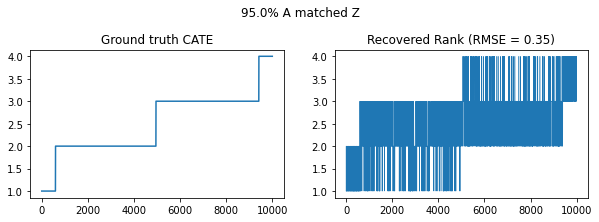

In [3]:
xDim = 50
nSim = 10000
p_AgivenZ = 1
p_AgivenNotZ = 0.1

X_data, Y_data, A_data, nObs, Group_data, Y_0_data, Y_1_data, Z, A = sim_Unobs_Data(xDim, nSim, p_AgivenZ, p_AgivenNotZ)
Yhat_0, Yhat_1 = fit_IPTW_LR(X_data, Y_data,A_data, nObs)
a_matched_z, rmse, recovered_rank = evaluation(Yhat_0, Yhat_1, Group_data, Y_0_data, Y_1_data, A, Z)

## Violation of Assumption 2: Generate data violating the split-treatment criterion 

Avg compliance: -0.1
p_A: 0.6528, IPTW: 1.00 +/- 0.07
Est. Y_0 RMSE: 0.014741229332566101
Est. Y_1 RMSE: 0.17499404887224101
44.6% A matched Z, RMSE: 1.48


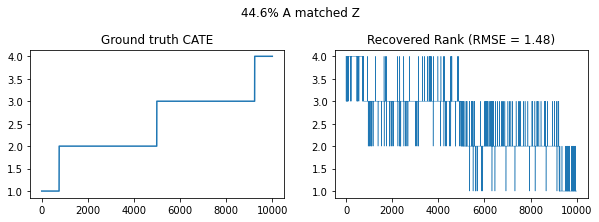

In [4]:
xDim = 50
nSim = 10000
p_AgivenZ = 0.6
p_AgivenNotZ = 0.7

X_data, Y_data, A_data, nObs, Group_data, Y_0_data, Y_1_data, Z, A = sim_Data(xDim, nSim, p_AgivenZ, p_AgivenNotZ)
Yhat_0, Yhat_1 = fit_IPTW_LR(X_data, Y_data, A_data, nObs)
a_matched_z, rmse, recovered_rank = evaluation(Yhat_0, Yhat_1, Group_data, Y_0_data, Y_1_data, A, Z)

# Refutation Analysis

## Placebo Confounder

Avg compliance: 0.5999999999999999
185.94156010921006 832585.9415601091
p_A: 0.5027, IPTW: 1.00 +/- 0.08
Est. Y_0 RMSE: 0.013640601478802115
Est. Y_1 RMSE: 0.06988158056511624
80.2% A matched Z, RMSE: 0.16
% of A matched Z 0.8025
Mean recovered rank without Placebo Treatment:  0.163707055437449 2.4972
(array([0., 1.]), array([4947, 5053]))
p_A: 0.5053, IPTW: 1.00 +/- 0.07
Est. Y_0 RMSE: 0.0439898523780649
Est. Y_1 RMSE: 41.16374392194413
49.5% A matched Z, RMSE: 1.32
% of A matched Z 0.4945
Mean recovered rank with Placebo Treatment:  1.3221951444472937 2.4972
Avg compliance: 0.5999999999999999
236.77213626487773 838870.1054695981
p_A: 0.4932, IPTW: 1.00 +/- 0.07
Est. Y_0 RMSE: 0.05137409474711702
Est. Y_1 RMSE: 0.23375176702115824
80.0% A matched Z, RMSE: 0.18
% of A matched Z 0.8003
Mean recovered rank without Placebo Treatment:  0.18055470085267789 2.5159
(array([0., 1.]), array([5050, 4950]))
p_A: 0.495, IPTW: 1.00 +/- 0.08
Est. Y_0 RMSE: 17.015871781785194
Est. Y_1 RMSE: 65.165880

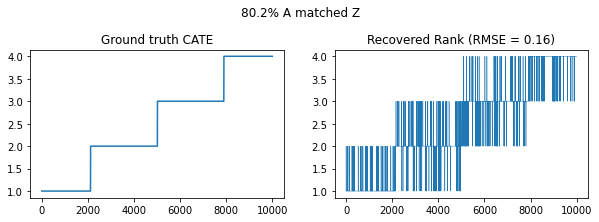

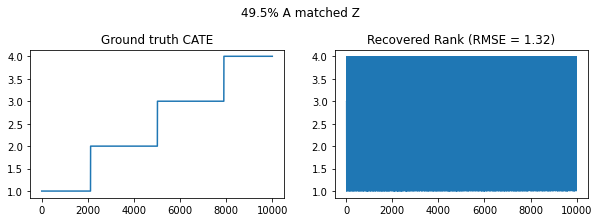

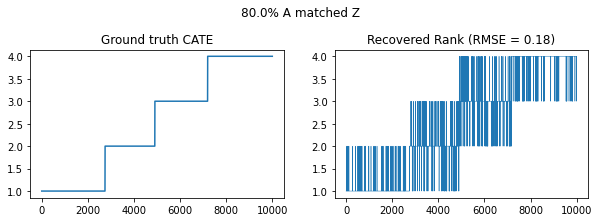

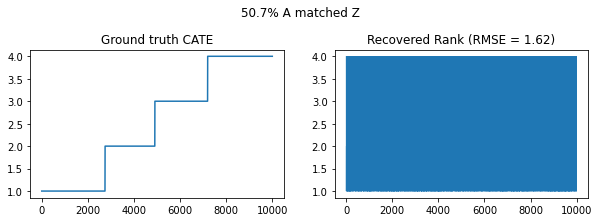

In [5]:
methods=['IPTW_LR', 'IPTW_SVM']

for method in methods:
    xDim = 50
    nSim = 10000

    #Data Generation
    # A percentage Z match 77% params
    p_AgivenZ= 0.8
    p_AgivenNotZ=0.2

    X_data, Y_data, A_data, nObs, Group_data, Y_0_data, Y_1_data, Z, A = sim_Data(xDim, nSim, p_AgivenZ, p_AgivenNotZ)
    print(np.sum(Y_0_data), np.sum(Y_1_data))

    # No Confounder
    if method == 'IPTW_LR':
        Yhat_0, Yhat_1 = fit_IPTW_LR(X_data, Y_data, A_data, nObs)
    elif method == 'IPTW_SVM':
        Yhat_0, Yhat_1 = fit_IPTW_SVM(X_data, Y_data, A_data, nObs)

    a_matched_z, rmse, recovered_rank = evaluation(Yhat_0, Yhat_1, Group_data, Y_0_data, Y_1_data, A, Z)
    print('% of A matched Z', a_matched_z)
    print('Mean recovered rank without Placebo Treatment: ', rmse, np.mean(recovered_rank))


    #Placebo Confounder
    A_matched_Z_unobs = []
    RMSEs_unobs = []

    A_data_placebo= placebo_confounder(X_data, A_data, Y_data)

    #Results on Confounded Data
    if method == 'IPTW_LR':
        Yhat_0, Yhat_1 = fit_IPTW_LR(X_data, Y_data,  A_data_placebo, nObs)
    elif method == 'IPTW_SVM':
        Yhat_0, Yhat_1 = fit_IPTW_SVM(X_data, Y_data,  A_data_placebo, nObs)

    a_matched_z, rmse, recovered_rank = evaluation(Yhat_0, Yhat_1, Group_data, Y_0_data, Y_1_data, A_data_placebo, Z)
    print('% of A matched Z', a_matched_z)
    print('Mean recovered rank with Placebo Treatment: ', rmse, np.mean(recovered_rank))

## Unobserved Confounder Test

In [ ]:
methods=['IPTW_LR', 'IPTW_SVM']
res=[]
res_refute=[]
for method in methods:

    alpha_range, sort_indice, a_matched_z, A_matched_Z_unobs, RMSEs_refute, RMSEs_unobs, RMSEs, corr_t, corr_y= refutation_analysis(method)

    A_matched_Z_unobs = np.array(A_matched_Z_unobs)
    RMSEs_unobs = np.array(RMSEs_unobs)

    sort_indice = np.argsort(A_matched_Z_unobs)
    sort_indice = sort_indice[::-1]
    
    res.append(RMSEs_unobs)
    res_refute.append(RMSEs_refute)

## RMSE Bar Plot

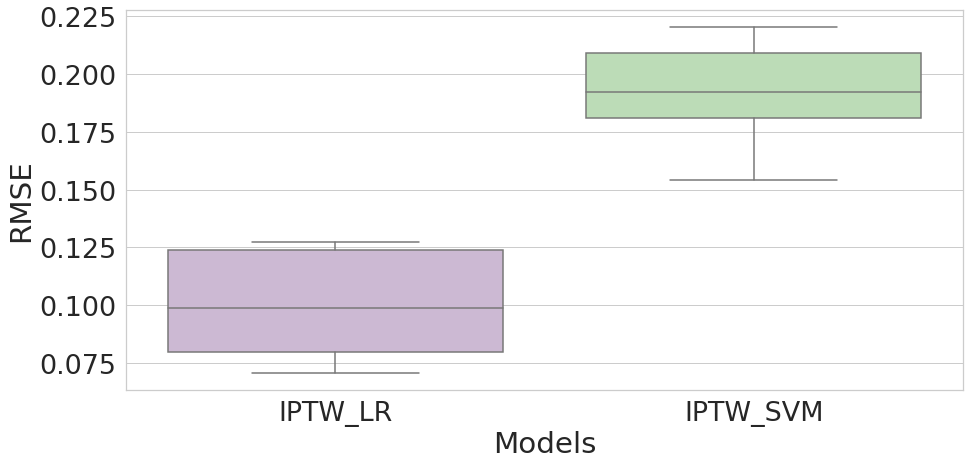

In [11]:
plot_df= pd.DataFrame(columns=methods)
for idx in range(len(methods)):
    plot_df[methods[idx]]= res_refute[idx]

sns.set(font_scale=2.45)
sns.set_style("whitegrid")
#sns.set(rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white")

fig, ax1 = plt.subplots(figsize = [15,7])

fig = sns.boxplot(data = plot_df, palette='PRGn')
fig.set_xlabel('Models')
fig.set_ylabel('RMSE')
plt.savefig('images/sensitivity_analysis_synthetic.png', dpi=200)